# MNIST Classification Model Comparison

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as XGBClassifier
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Load and Preprocess Data

In [2]:
# Load MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # Normalize
y = y.astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Initialize Classifiers

In [7]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

## Train and Evaluate Models

In [8]:
results = {}
misclassified_images = {}

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    duration = time.time() - start_time
    
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "accuracy": acc,
        "report": report,
        "conf_matrix": conf_matrix,
        "train_time": duration
    }

    # Save misclassified examples
    idx = np.where(y_pred != y_test)[0][:5]
    misclassified_images[name] = {
        "images": X_test[idx],
        "true_labels": y_test[idx],
        "predicted_labels": y_pred[idx]
    }
    
    # Print classification report
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2058
           1       0.95      0.97      0.96      2364
           2       0.92      0.90      0.91      2133
           3       0.90      0.89      0.90      2176
           4       0.92      0.93      0.93      1936
           5       0.89      0.88      0.88      1915
           6       0.94      0.95      0.95      2088
           7       0.93      0.94      0.93      2248
           8       0.89      0.87      0.88      1992
           9       0.90      0.90      0.90      2090

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000

Training SVM...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0

C:\Users\bbuser\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:38:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0.98      0.97      2133
           3       0.98      0.96      0.97      2176
           4       0.97      0.98      0.98      1936
           5       0.98      0.97      0.98      1915
           6       0.98      0.99      0.98      2088
           7       0.97      0.98      0.97      2248
           8       0.97      0.97      0.97      1992
           9       0.96      0.97      0.96      2090

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



## Compare Accuracies and Training Time

In [9]:
summary_df = pd.DataFrame({
    model: {
        "Accuracy": round(results[model]["accuracy"], 4),
        "Training Time (s)": round(results[model]["train_time"], 2)
    }
    for model in results
}).T

summary_df

,Accuracy,Training Time (s)
Logistic Regression,0.9207,33.85
SVM,0.9763,175.32
Decision Tree,0.8683,24.42
Random Forest,0.9668,47.33
XGBoost,0.9762,150.35


# Visualize Accuracy Comparison

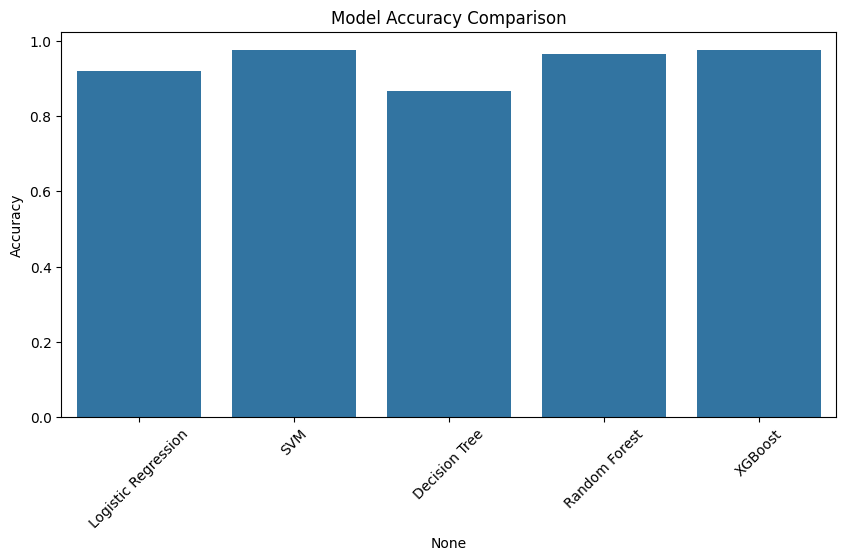

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x=summary_df.index, y="Accuracy", data=summary_df.reset_index())
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

# Confusion Matrices

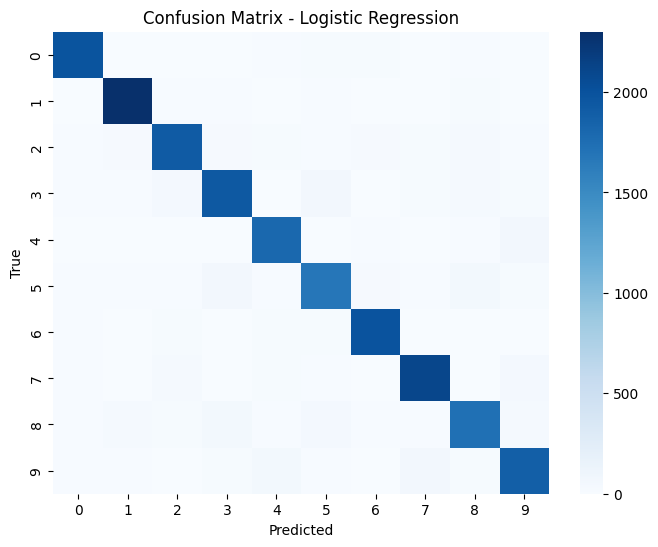

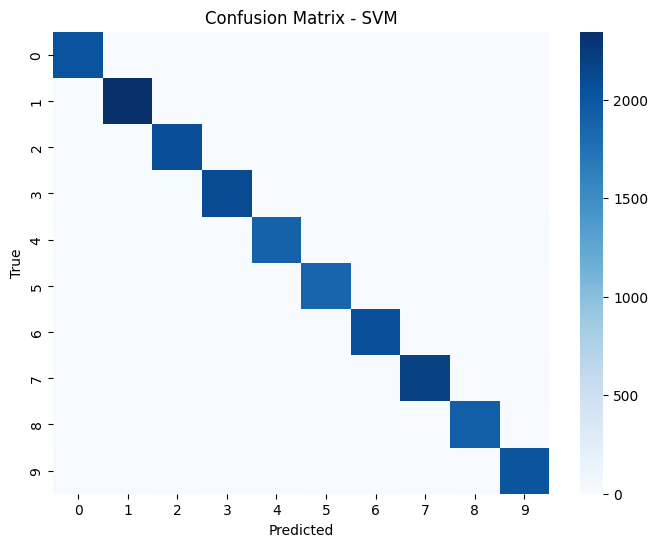

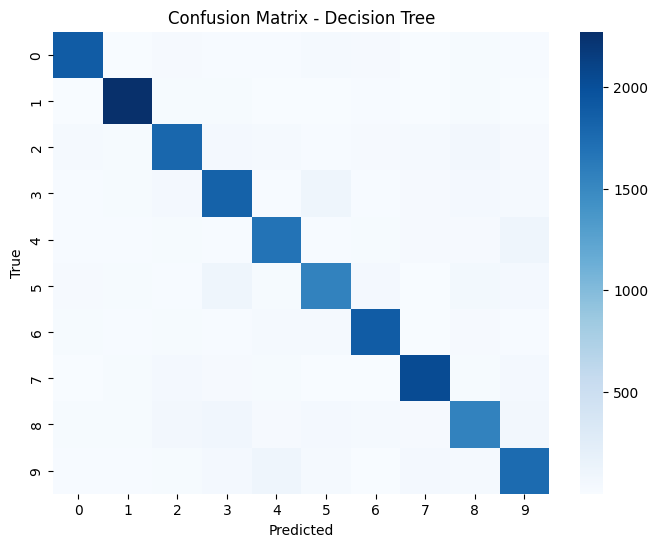

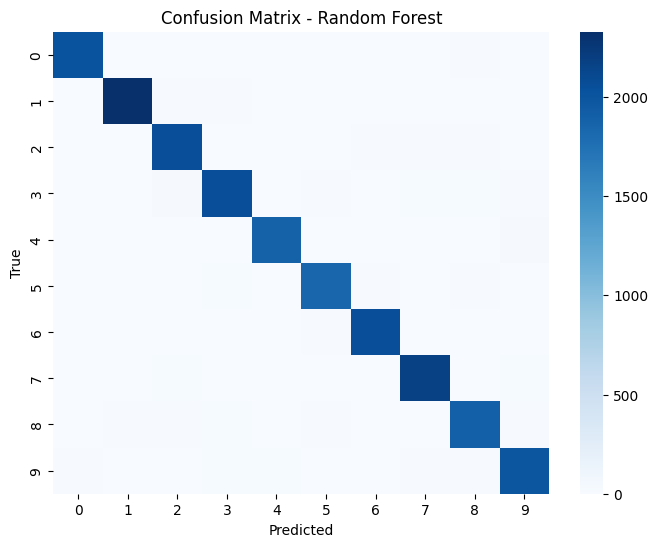

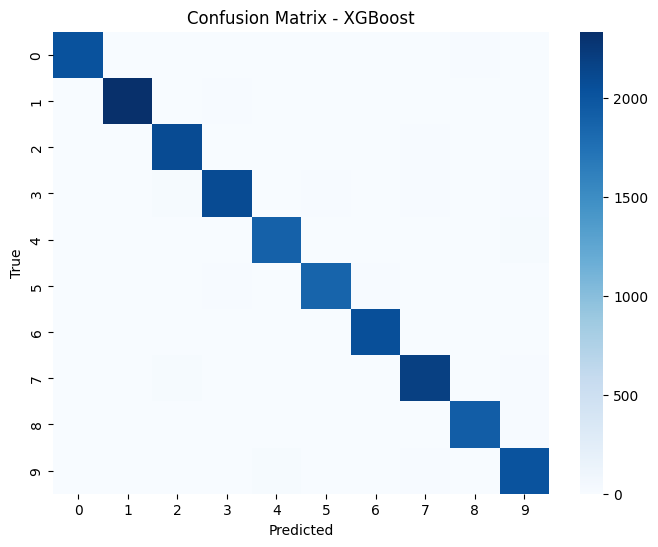

In [11]:
for model_name, data in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(data["conf_matrix"], cmap='Blues', annot=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Error Analysis – Misclassified Images

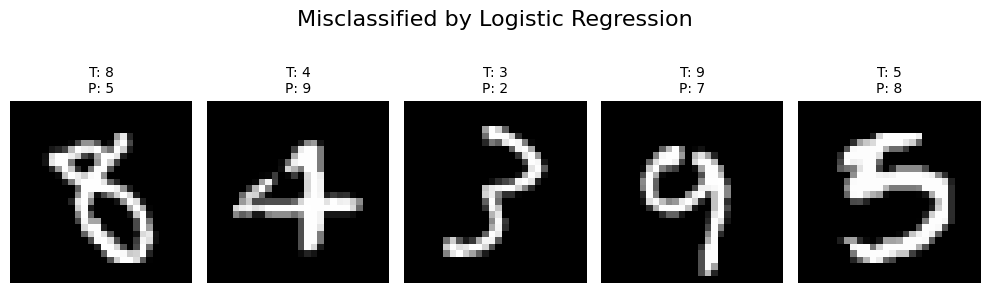

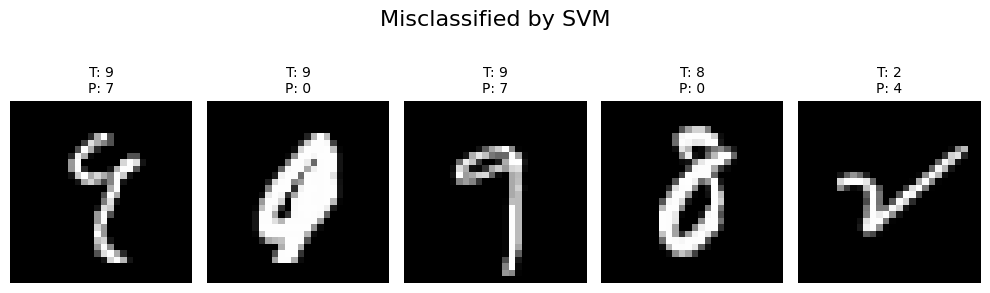

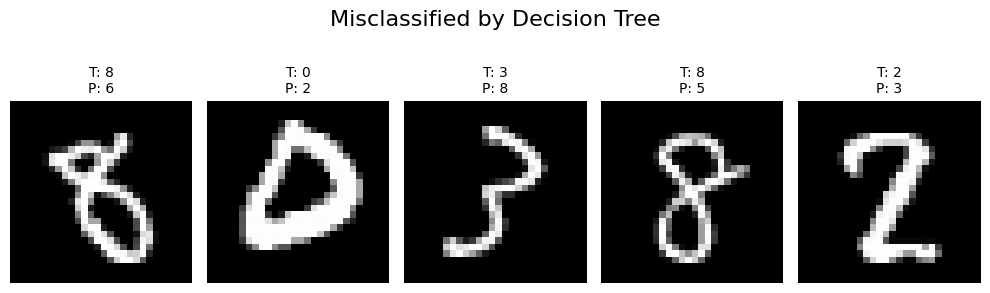

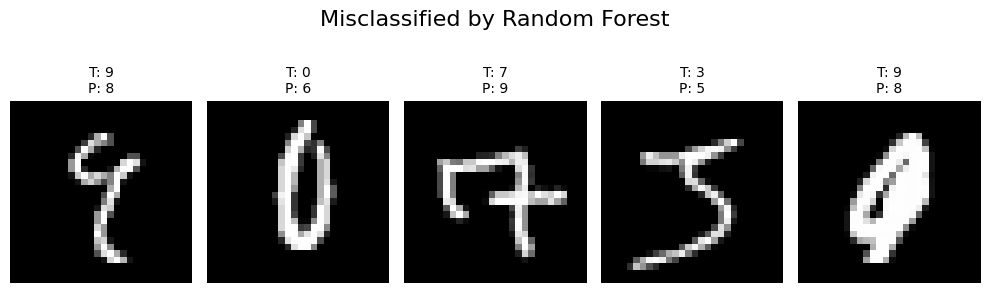

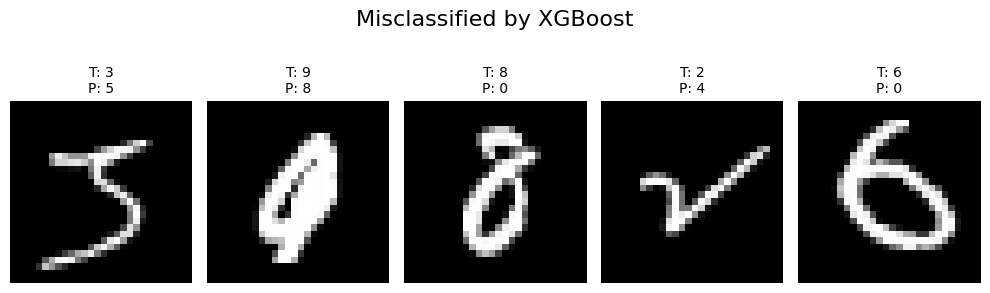

In [16]:
for model_name, data in misclassified_images.items():
    images = data["images"].reshape(-1, 28, 28)
    true = data["true_labels"]
    pred = data["predicted_labels"]

    plt.figure(figsize=(10, 3))
    
    # Title for entire figure (clearly visible)
    plt.suptitle(f"Misclassified by {model_name}", fontsize=16, y=1.05)

    for i in range(len(images)):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i], cmap="gray")
        plt.title(f"T: {true[i]}\nP: {pred[i]}", fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

Random Forest & XGBoost show similar patterns with variations in the specific misclassifications.
these errors occur because :
1. Poor Image Quality: Blurry, pixelated, or low-contrast digits
2. Ambiguous Handwriting: Digits written in ways that blur the boundaries between classes
3. Incomplete Strokes: Missing connections or gaps that change the digit's apparent structure
4. Similar Shapes: Digits that share geometric features (curves, loops, lines)
##### Model-Specific Limitations:
1. Logistic Regression: Struggles with complex non-linear patterns and pixel-level variations
2. SVM: Can be sensitive to the specific features it uses for decision boundaries
3. Decision Trees: May focus on specific pixel regions that don't generalize well
4. Ensemble Methods (Random Forest, XGBoost): Generally more robust but still affected by consistently ambiguous cases